In [1]:
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd
from konlpy.tag import Okt  
okt = Okt() 
import tensorflow as tf
import numpy as np
from collections import Counter

from wordcloud import WordCloud
import matplotlib.pyplot as plt


import urllib.request
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [2]:
import matplotlib.pyplot as plt 
%matplotlib inline
from string import punctuation
import warnings
warnings.filterwarnings('ignore')

In [41]:
# 불용어 (가사 빈도수 높은 + 감정분류와 무관한 단어 추가 중)
stop_w = ['all','이렇게','네가','있는','니가','없는','너의','너무','그런',
          'oh','whoo','tuesday','내가','너를','나를','we','this','the','그렇게',
          'so','am','baby','and','can','you','much','me','for','go','in',
          '은', '는', '이', '가', '하',
          'know','no','of','let','my','사랑','수','너','내','나','그','난','봐','돼','건','모든',
          '날','널','수','것','못','말','넌','젠','하나','정말','알','여기','우리','그대','다시',
          '때','아','더','게','또','채','일','걸','누구','나는','너는','라면','같아','있어','지금',
          '의','가','보','들','좀','잘','걍','과','도','를','으로','우린','하지','해도','하고',
          '자','에','와','한','하다','네','있다','나의','해','다','내게','왜','거야','이제','그냥','했던','하는']

In [4]:
top10 = pd.read_csv('pre_top10.csv')
top10.head()

,song_id,song_name,artist,album,Like_Count,Lyric,cover_url
0,6137331,Control,GHOST9(고스트나인),NOW : Who we are facing,[9],원하잖아 멀지 않은 곳 예정된 운명의 그 심포니 널 걸어봐 ...,https://image.bugsm.co.kr/album/images/200/406...
1,6137100,모르겠어,어반자카파,이 별,[129],날 보는 눈빛이 남들을 볼 때와 별다를 게 없고 내가 하는 얘기엔 관심도 없고 ...,https://image.bugsm.co.kr/album/images/200/406...
2,32391985,놀,박화요비,놀,[21],지친 우리 하루 끝엔 늘 저 놀이 기다렸네 힘들지 물어오면 난 널 더 깊이 안...,https://image.bugsm.co.kr/album/images/200/204...
3,32390155,나침반 (Feat. 개리),TRADE L,Time Table - The Trip,[15],발을 디디기엔 아직 겁이 나 이런 감정은 아마 내게 처음이야 니 눈에 비친 내 ...,https://image.bugsm.co.kr/album/images/200/204...
4,6137323,Designer,히오,Designer,[9],더하고 뺄 것 없는 느낌 딱 맞춘 것처럼 나를 감싼 빛을 봐 내 주위를...,https://image.bugsm.co.kr/album/images/200/406...


In [5]:
lyric = top10.Lyric

In [6]:
tagging_okt = []
for i in lyric:
    tag_word = okt.pos(i)
    tagging_okt.append(tag_word)

In [7]:
corpus = []
for song in tagging_okt:
    for word in song:
        if (word[1] == 'Adjective') or (word[1] =='Noun') or (word[1] =='Verb'):
            corpus.append(word[0])

In [8]:
word_dict = {}
for i in corpus:
    if i in word_dict:
        word_dict[i] += 1
    else: 
        word_dict[i] = 1
        
print(word_dict)

{'원하잖아': 1, '멀지': 1, '않은': 4, '곳': 5, '예정': 1, '된': 13, '운명': 3, '그': 31, '심포니': 1, '널': 26, '걸어': 9, '봐': 26, '더': 28, '빠르게': 2, '뜨겁게': 1, '달려': 6, '마치': 4, '선율': 1, '위': 5, '나': 122, '가': 4, '될': 6, '역작': 1, '새겨져': 1, '자극': 1, '너': 113, '꿈꾸며': 2, '날': 44, '둘': 2, '완벽해': 2, '어둠': 6, '속': 25, '향연': 3, '뜨거운': 2, '갈증': 2, '목': 4, '말라': 3, '지휘': 3, '하는': 14, '스며들어': 3, '가는': 4, '오감': 3, '손끝': 4, '따라': 5, '심장': 6, '뒤': 8, '덮는': 3, '감각': 3, '느껴': 3, '시작': 10, '적막': 3, '위로': 10, '난': 67, '깨워': 4, '짙은': 3, '밤': 25, '넘어': 5, '똑바로': 1, '나를': 35, '집중': 1, '해': 51, '연주': 1, '뻔한': 1, '흐름': 1, '찾아': 2, '숨겨진': 1, '움직여': 1, '네': 17, '맘': 15, '홀릴': 1, '메': 3, '마른': 3, '채워': 5, '인해서': 1, '되는걸': 1, '또': 12, '인해': 1, '완성': 3, '되는': 2, '마지막': 1, '없인': 1, '길': 7, '잃지': 1, '보는': 2, '눈빛': 2, '남': 1, '볼': 1, '때': 21, '별다를': 1, '게': 4, '없고': 2, '내': 86, '얘기': 3, '관심': 3, '마지못해': 1, '고': 1, '갤': 1, '끄덕': 1, '부터': 2, '혼자': 3, '먼저': 2, '연락': 2, '한다': 1, '느끼고': 1, '우리': 27, '좀': 6, '서운함': 1, '내비': 1, '칠': 1, '미안해'

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words=stop_w)
tdm = cv.fit_transform(corpus)

In [43]:
tdm.shape

(4673, 1426)

In [44]:
cv.get_feature_names()[:10]

['가고', '가끔', '가는', '가는거야', '가니까', '가던지', '가도', '가득', '가득한', '가득해']

In [45]:
len(cv.get_feature_names())

1426

In [46]:
wc = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

In [47]:
wc.tail(5)

,단어,빈도
1421,힘들던,1
1422,힘들어,2
1423,힘들었던,2
1424,힘들지,1
1425,힙합,5


In [54]:
wc.sort_values('빈도', ascending=False).head(30)

,단어,빈도
729,생각,18
427,마음,17
882,않아,16
786,슬로우,14
791,시간,14
89,계속,14
772,순간,13
1171,정신,13
473,매일,12
1359,항상,12


In [49]:
from wordcloud import WordCloud
WC = WordCloud(font_path='NanumBarunGothic.ttf' ,background_color='white', width=400, height=300)
count_dic = wc.set_index('단어')['빈도'].to_dict()
count_dic

{'가고': 5,
 '가끔': 1,
 '가는': 4,
 '가는거야': 1,
 '가니까': 1,
 '가던지': 1,
 '가도': 1,
 '가득': 3,
 '가득한': 1,
 '가득해': 3,
 '가득했던': 3,
 '가득히': 2,
 '가만있기': 2,
 '가만있긴': 1,
 '가며': 2,
 '가면': 1,
 '가봐': 1,
 '가사': 4,
 '가슴': 2,
 '가시': 1,
 '가자': 1,
 '가장': 2,
 '가져간': 1,
 '가져다줬어': 1,
 '가주세요': 2,
 '가지': 1,
 '가지마': 1,
 '가진': 2,
 '가치': 1,
 '가치관': 1,
 '각종': 3,
 '간절하고': 2,
 '갇혀': 2,
 '갈게': 1,
 '갈수록': 4,
 '갈증': 2,
 '감각': 3,
 '감사하지': 1,
 '감싸': 2,
 '감싼': 1,
 '감아': 2,
 '감아도': 1,
 '감정': 8,
 '갔다': 1,
 '갔지': 1,
 '강백호': 1,
 '강변': 1,
 '강아지': 1,
 '같다고': 1,
 '같다는': 1,
 '같던': 4,
 '같은': 2,
 '같은건': 1,
 '같지만': 1,
 '개네는': 1,
 '개월': 1,
 '개천': 1,
 '걔넨': 1,
 '거리': 1,
 '거의': 1,
 '거지': 1,
 '거쳐': 1,
 '거친': 2,
 '걱정': 1,
 '건가': 1,
 '건강': 1,
 '건강해': 1,
 '건지': 3,
 '걷는': 1,
 '걷는다면': 1,
 '걸까': 4,
 '걸때': 1,
 '걸리던지': 1,
 '걸어': 9,
 '걸어가는거야': 1,
 '걸었던': 1,
 '걸음': 2,
 '걸지': 1,
 '검빨': 1,
 '겁나': 1,
 '겁쟁이': 1,
 '게임': 1,
 '겠죠': 1,
 '겨울': 2,
 '격하': 1,
 '겪었': 4,
 '견고한': 1,
 '견뎌': 1,
 '견뎠으니까': 1,
 '계속': 14,
 '계절': 2,
 '고마웠다고': 3,
 '고민': 6,
 '고요히': 1,
 '고파':

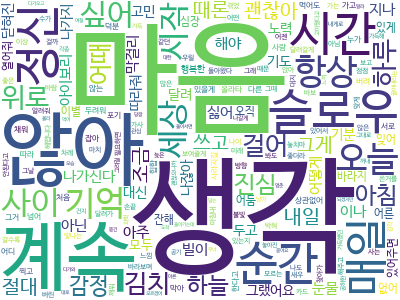

In [53]:
cloud = WC.generate_from_frequencies(count_dic)
cloud.to_image()